62070505235 จิราพัชร พรเจริญวิโรจน์

# Lab - Heart Disease

## Task
Build ML model to classify patients with heart disease.
## Due Date
19 October 2020
Submit the PDF file of this notebook to LEB2
## Data
Data is in the file "heart.csv"
### Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "target" field refers to the presence of heart disease in the patient, 0 for not present and 1 for present.

### Content

Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 0 for normal, 1 for heart disease

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

Reference: https://www.kaggle.com/ronitf/heart-disease-uci

# 1. Load data

In [2]:
import pandas as pd
pd.set_option('max_columns',500)
heartData = pd.read_csv('heart.csv', na_values=' ')
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heartData.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [10]:
heartData.shape

(303, 14)

# 2. Sample your data

In [7]:
heartData_train = heartData.sample(frac=0.7)

In [9]:
heartData_train.shape

(212, 14)

In [12]:
heartData_test = heartData.drop(index=heartData_train.index)

In [13]:
heartData_test.shape

(91, 14)

# 3. Train a decision tree model

In [8]:
from sklearn.tree import DecisionTreeClassifier #สร้าง object decision tree 

In [10]:
tree = DecisionTreeClassifier(min_samples_leaf=10)
tree.fit(heartData_train.drop(columns='target'), 
         heartData_train['target'])

DecisionTreeClassifier(min_samples_leaf=10)

# 4. Plot a decision tree

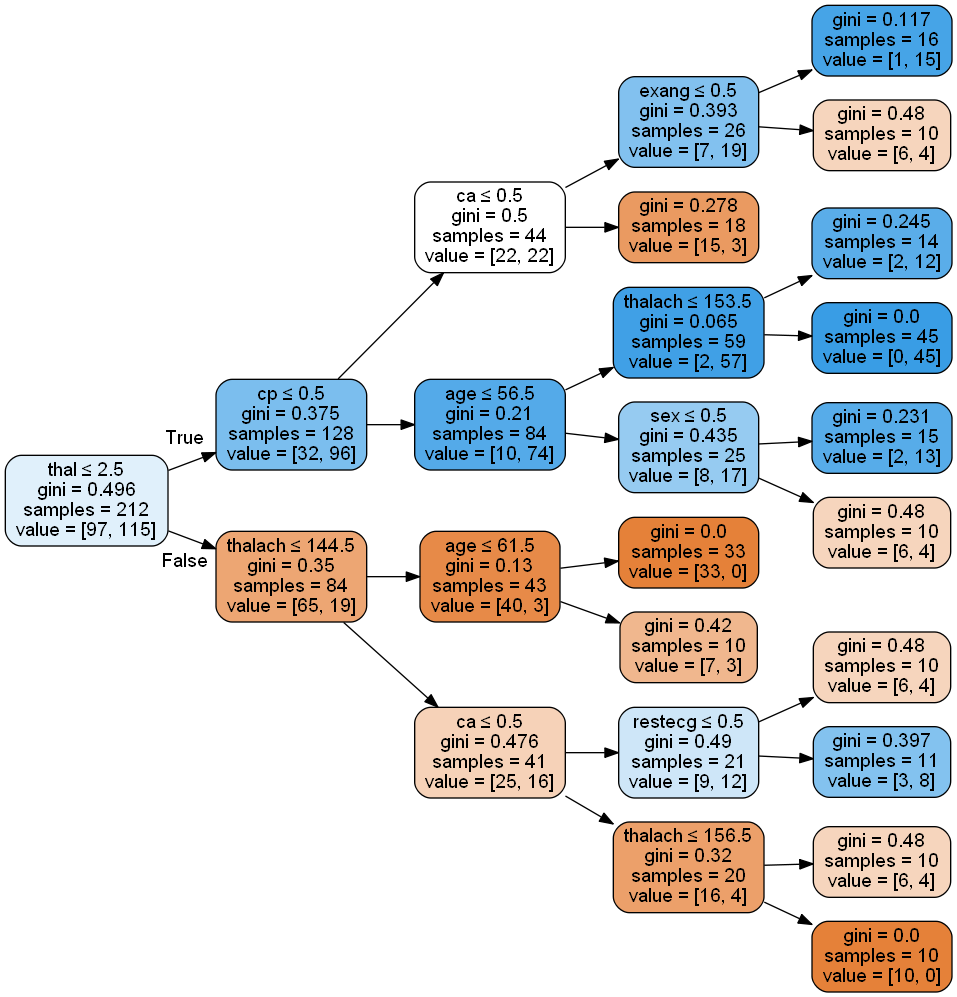

In [11]:
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                rotate=True,
                feature_names=heartData_train.columns[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('hearttree.png')
Image(graph.create_png())

# 5. Variable importance

In [12]:
pd.DataFrame(dict(Feature=heartData_train.columns[:-1],
                  Value=tree.feature_importances_))\
  .sort_values(by='Value', ascending=False)

,Feature,Value
12,thal,0.436895
11,ca,0.150634
2,cp,0.131565
7,thalach,0.099636
0,age,0.066812
8,exang,0.055819
1,sex,0.041024
6,restecg,0.017614
3,trestbps,0.000000
4,chol,0.000000


# 6. Prediction

In [14]:
tree.predict(heartData_test.drop(columns='target'))

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [15]:
tree.predict_proba(heartData_test.drop(columns='target'))

array([[0.6       , 0.4       ],
       [0.6       , 0.4       ],
       [0.0625    , 0.9375    ],
       [0.14285714, 0.85714286],
       [0.27272727, 0.72727273],
       [0.27272727, 0.72727273],
       [0.0625    , 0.9375    ],
       [0.14285714, 0.85714286],
       [0.0625    , 0.9375    ],
       [0.6       , 0.4       ],
       [0.13333333, 0.86666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.6       , 0.4       ],
       [0.13333333, 0.86666667],
       [0.        , 1.        ],
       [0.6       , 0.4       ],
       [0.6       , 0.4       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.6       , 0.4       ],
       [0.        , 1.        ],
       [0.13333333, 0.86666667],
       [0.6       , 0.4       ],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

# 7. Classification report

ประเมินโมเดล

In [18]:
from sklearn.metrics import classification_report

res = tree.predict(heartData_test.drop(columns='target'))
print(classification_report(y_true=heartData_test['target'].values, y_pred=res))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        41
           1       0.89      0.68      0.77        50

    accuracy                           0.78        91
   macro avg       0.80      0.79      0.78        91
weighted avg       0.81      0.78      0.78        91

